**[Chapter 1:](#Chapter-1)**
    Vectors and matrices 🔢
    
**[Chapter 2:](#Chapter-2)**
    Ordinary least squares 📏
    
**[Chapter 3:](#Chapter-3)**
    Probability distributions 🎲
    
---

# Chapter 1
Vectors and matrices 🔢

**(Warm-up)**

Without any imports, create a function **`vec_mult()`** that takes two lists and returns their vector dot product.

```python
def vec_mult(vec1, vec2):
    # your code here
    return res

x = [1, 2, 3]
y = [4, 5, 6]

z = vec_mult(x, y)
print(z)
```

---

**(Challenge)**

Let a list of numbers represent a row vector. Let a list of row vectors represent a matrix. I've made a function `mprint` to print the matrix representation.

Without using imports:

1. Create a function called **`transpose()`** that takes a matrix and returns its transpose.

2. Create a function called **`mat_mult()`** that takes two matrices and returns their dot product.

Check your results with numpy.

```python
def transpose(X):
    # your code here
    return

def mat_mult(X, Y):
    # your code here  
    return

def mprint(M, *args, **kwargs):
    '''
    Quick print list M as matrix
    '''
    mat_rep = str(M).replace('],', '],\n')
    print(mat_rep, *args, **kwargs)
    
# test cases
X = [[1, 2],
     [3, 4],
     [5, 6]]

Y = transpose(X)
Z = mat_mult(X, Y)

mprint(X, '\n')
mprint(Y, '\n')
mprint(Z)
```

In [1]:
# warm-up

def vec_mult(vec1, vec2):
    
    res = sum(a * b for a, b in zip(vec1, vec2))
    
    return res

x = [1, 2, 3]
y = [4, 5, 6]

z = vec_mult(x, y)
print(z)

32


In [2]:
# challenge

def transpose(X):

    Y = [[0 for _ in X] for _ in X[0]]

    for i, xrow in enumerate(X):
        
        for j, v in enumerate(xrow):
        
            Y[j][i] = v

    return Y

def mat_mult(X, Y):
    
    # convert column vector to "row vector"
    YT = transpose(Y)
    
    Z = [[0 for _ in Y[0]] for _ in X]
    
    # for row vector in x
    for i, x in enumerate(X):
        
        # for column vector in Y (row vector in Y.T)
        for j, y in enumerate(YT):
            
            Z[i][j] = vec_mult(x, y)
            
    return Z

def mprint(M, *args, **kwargs):
    '''
    Quick print list M as matrix
    '''
    mat_rep = str(M).replace('],', '],\n')
    print(mat_rep, *args, **kwargs)

# test case
X = [[1, 2],
     [3, 4],
     [5, 6]]

Y = transpose(X)
Z = mat_mult(X, Y)

mprint(X, '\n')
mprint(Y, '\n')
mprint(Z)

[[1, 2],
 [3, 4],
 [5, 6]] 

[[1, 3, 5],
 [2, 4, 6]] 

[[5, 11, 17],
 [11, 25, 39],
 [17, 39, 61]]


# Chapter 2
Ordinary least squares 📏

**(Challenge)**

The following code generates two vectors `y, x`.
```python
# import packages
import numpy as np
import matplotlib.pyplot as plt

# seed pseudo-random number generators
np.random.seed(123)


# number of observations
n = 100

# simulate observations
b0, b1 = np.random.normal(3, 1, 2) # parameters
noise = np.random.normal(0, 3, n)  # noise

x = np.random.normal(0, 5, n)      # independent variable
y = b0 + b1 * x + noise            # dependent variable


# plot
plt.figure(figsize=(7, 5))

plt.scatter(x, y, alpha=0.5)

plt.ylabel('y-axis')
plt.xlabel('x-axis')

plt.show()
```

The **Ordinary-least squares (OLS)** method estimates regression parameters $\hat\beta$ by minimizing the loss function:
$$\begin{align}
    \min_{\hat\beta} L
    &= \sum_{i=0}^{N-1} \left(y_i - \hat{y}_i\right)^2 \\
    &= \left(y_0 - \hat{y}_0\right)^2 + \left(y_1 - \hat{y}_1\right)^2 + ... + \left(y_{N-1} - \hat{y}_{N-1}\right)^2
\end{align}$$

Use **OLS** to calculate the coefficients estimates $\hat\beta = \left\langle \hat\beta_0, \hat\beta_1 \right\rangle$ of the linear regression model:
$$
\hat{y}_i = \hat\beta_0 + \hat\beta_1 x_i + \epsilon_i
$$

---

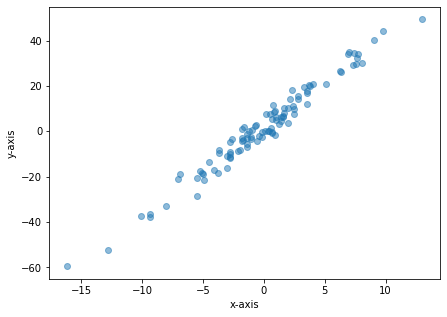

In [3]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

# seed pseudo-random number generators
np.random.seed(123)


# number of observations
n = 100

# simulate observations
b0, b1 = np.random.normal(3, 1, 2) # parameters
noise = np.random.normal(0, 3, n)  # noise

x = np.random.normal(0, 5, n)      # independent variable
y = b0 + b1 * x + noise            # dependent variable


# plot
plt.figure(figsize=(7, 5))

plt.scatter(x, y, alpha=0.5)

plt.ylabel('y-axis')
plt.xlabel('x-axis')

plt.show()

In [4]:
import pandas as pd


def get_returns(ticker, period=30):
    
    url_params = 'period1=992563200&period2=1637193600&interval=1d&events=history&includeAdjustedClose=true'
    url = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?' + url_params
    
    df = pd.read_csv(url)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index("Date")
    
    res = df['Adj Close'].pct_change(period).dropna()
    res.name = ticker
    return res

wmt = get_returns('WMT')
tsla = get_returns('TSLA')
vti = get_returns('VTI')

In [5]:
wmt_vti = pd.merge(wmt, vti, how='inner',
         left_index=True,
         right_index=True)

corr_wmt_vti = wmt_vti.corr()['VTI']['WMT']
print(corr_wmt_vti)

0.3561621196605501


<AxesSubplot:xlabel='VTI', ylabel='WMT'>

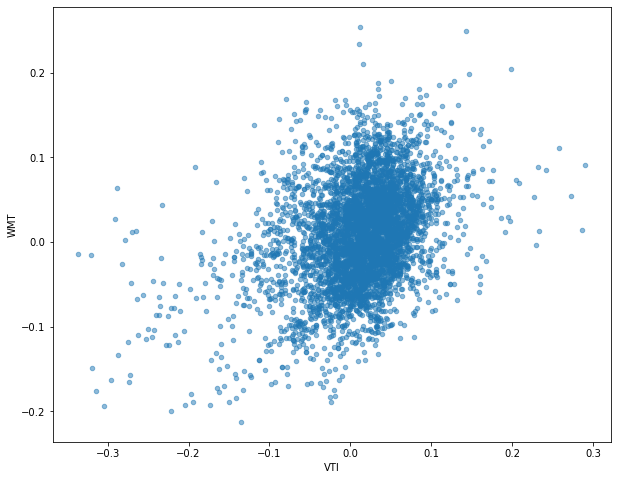

In [6]:
wmt_vti.plot.scatter('VTI', 'WMT', figsize=(10, 8), alpha=0.5)

# Chapter 3
Probability distributions 🎲

**(Challenge)**

In [7]:
import time
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats

dcolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

0.4807


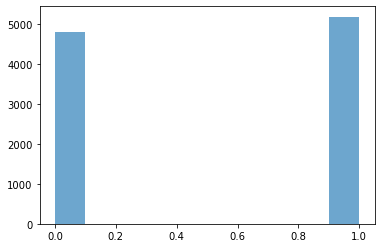

In [8]:
# create random coin flip

def flip_coin():
    '''
    Return 1 or 0 with prob 0.5
    '''
    for i in range(1000):
        t = time.perf_counter_ns()
        v = int(str(t)[-3])

        if v % 2:
            return 1
        else:
            return 0
        
samples = [flip_coin() for _ in range(10_000)]
print(samples.count(0) / len(samples))

plt.hist(samples, alpha=0.65)
plt.show()

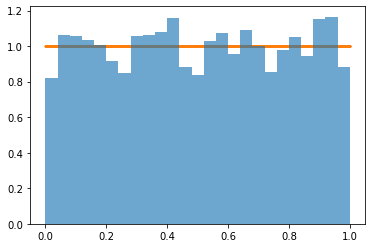

In [9]:
# uniform distribution

def uniform(a, b):
    '''
    Returns sample from uniform distribution converted from random binary string
    '''
    binary_dec_values = [flip_coin() * (2**(-n)) for n in range(1, 201)]
    rv = sum(binary_dec_values)
    
    span = b - a
    rv = rv * span + a
    
    return rv

samples = [uniform(0, 1) for _ in range(10_000)]

plt.hist(samples, bins=25, density=True, alpha=0.65)
plt.scatter(samples, stats.uniform(0, 1).pdf(samples), s=1, c=dcolors[1])
plt.show()

0.697


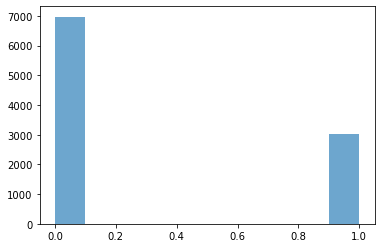

In [10]:
# bernoulli distribution

def bern(p):
    '''
    Returns sample from Bernoulli distribution
    '''
    rv = int(uniform(0, 1) >= p)
    return rv

samples = [bern(0.7) for _ in range(10_000)]
print(samples.count(0) / len(samples))

plt.hist(samples, alpha=0.65)
plt.show()

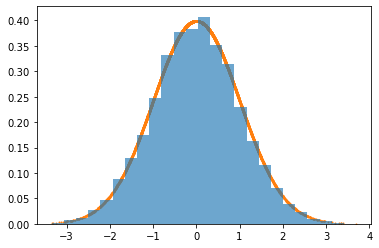

In [11]:
# normal distributions

def normal(mean=0, stdev=1):

    # radius
    r = math.sqrt(-2*np.log(uniform(0, 1)))
    
    # angle
    theta = uniform(0, 2*math.pi)
    
    # construct standard normal value
    rv = r * math.sin(theta)
    
    # adjust for mean and scale (standard deviation)
    rv = (rv * stdev) + mean
    
    return rv

samples = [normal() for _ in range(10_000)]
plt.hist(samples, bins=25, density=True, alpha=0.65) # plot sample data
plt.scatter(samples, stats.norm.pdf(samples), s=1, c=dcolors[1]) # plot 
plt.show()

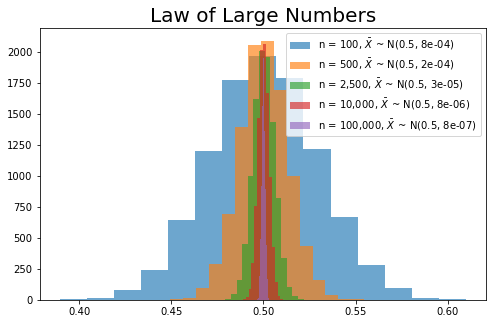

In [14]:
# law of large numbers

plt.figure(figsize=(8, 5))

for n in [100, 500, 2500, 10_000]:
    
    sample_means = [np.random.random(n).mean() for _ in range(10_000)]
    
    mean = np.mean(sample_means)
    var = np.var(sample_means)
    
    bar = '\\bar'
    plt.hist(sample_means, bins=15,
             label=f'n = {n:,}, ${bar}X$ ~ N({mean:.1f}, {var:.0e})', alpha=0.65)

plt.title("Law of Large Numbers", fontsize=20)
plt.legend()
plt.show()

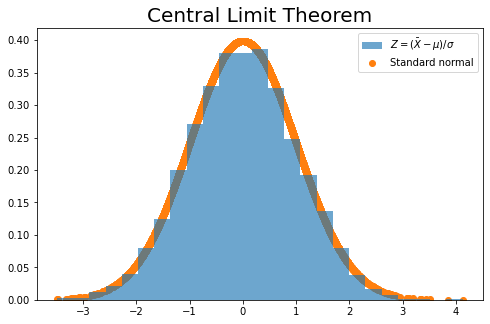

In [13]:
X = np.array([np.random.random(n).mean() for _ in range(10_000)])

Z = (X - X.mean()) / X.std()

plt.figure(figsize=(8, 5))
plt.title("Central Limit Theorem", fontsize=20)

plt.hist(Z, bins=25, alpha=0.65, density=True, label=r'$Z=(\bar{X} - \mu)/\sigma$')
plt.scatter(Z, stats.norm.pdf(Z), c=dcolors[1], label='Standard normal')

plt.legend()
plt.show()